# import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Load Dataset

In [4]:
import pandas as pd
df = pd.read_csv("covid_dataset_sample_1000.csv")
df.head()


,date,country,confirmed,deaths,recovered,tests,vaccinations
0,2020-01-01,Italy,4948,99,4090,9901,2907
1,2020-01-02,Russia,5019,102,3932,10066,3028
2,2020-01-03,Germany,5121,92,3914,10118,2905
3,2020-01-04,UK,5059,89,3907,10114,2905
4,2020-01-05,Italy,4867,98,3921,9946,2989


# basic dataset info

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1000 non-null   object
 1   country       1000 non-null   object
 2   confirmed     1000 non-null   int64 
 3   deaths        1000 non-null   int64 
 4   recovered     1000 non-null   int64 
 5   tests         1000 non-null   int64 
 6   vaccinations  1000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 54.8+ KB


,confirmed,deaths,recovered,tests,vaccinations
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,5000.516000,100.280000,3999.72100,9998.953000,2996.93500
std,69.986069,9.741792,63.58352,99.837349,53.36597
min,4790.000000,71.000000,3800.00000,9699.000000,2824.00000
25%,4951.000000,94.000000,3957.00000,9932.000000,2962.00000
50%,5001.000000,100.000000,4000.50000,10002.000000,2997.00000
75%,5049.250000,107.000000,4044.00000,10066.000000,3033.00000
max,5250.000000,153.000000,4201.00000,10332.000000,3183.00000


# Basic Exploration

In [7]:
# Shape of dataset
print("Shape:", df.shape)


Shape: (1000, 7)


In [6]:

# Check missing values
print(df.isnull().sum())

date            0
country         0
confirmed       0
deaths          0
recovered       0
tests           0
vaccinations    0
dtype: int64


# Visual Representation

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("covid_dataset_sample_1000.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Preview data
df.head()

,date,country,confirmed,deaths,recovered,tests,vaccinations
0,2020-01-01,Italy,4948,99,4090,9901,2907
1,2020-01-02,Russia,5019,102,3932,10066,3028
2,2020-01-03,Germany,5121,92,3914,10118,2905
3,2020-01-04,UK,5059,89,3907,10114,2905
4,2020-01-05,Italy,4867,98,3921,9946,2989


# Line Plot – Daily Confirmed Cases Over Time

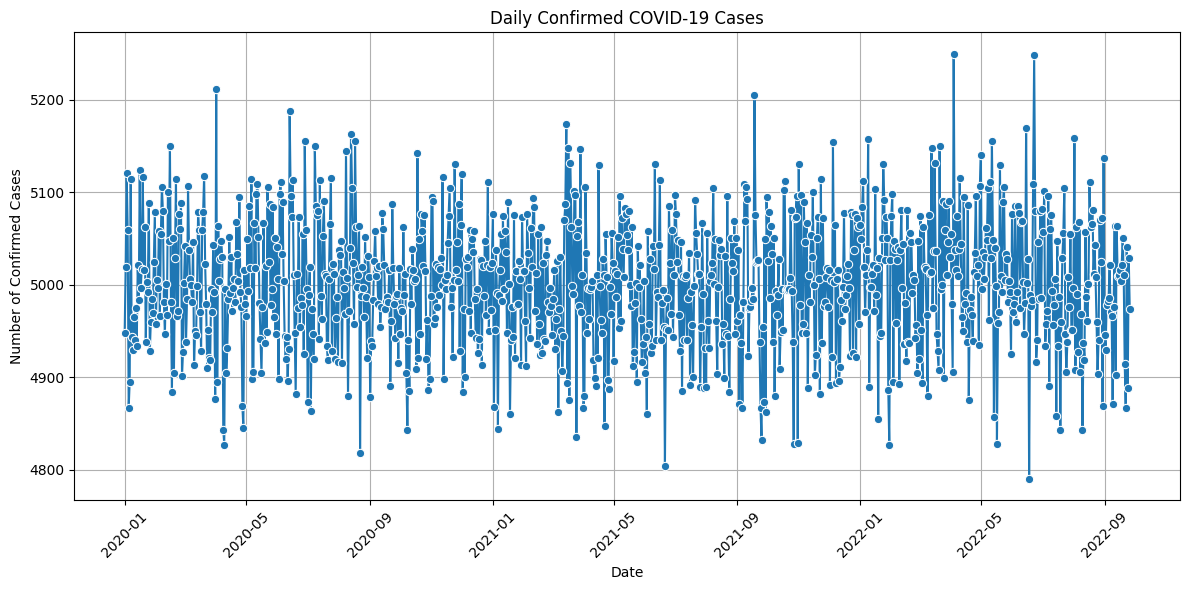

In [9]:
daily_cases = df.groupby('date')['confirmed'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_cases, x='date', y='confirmed', marker='o')
plt.title('Daily Confirmed COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot – Total Cases by Country

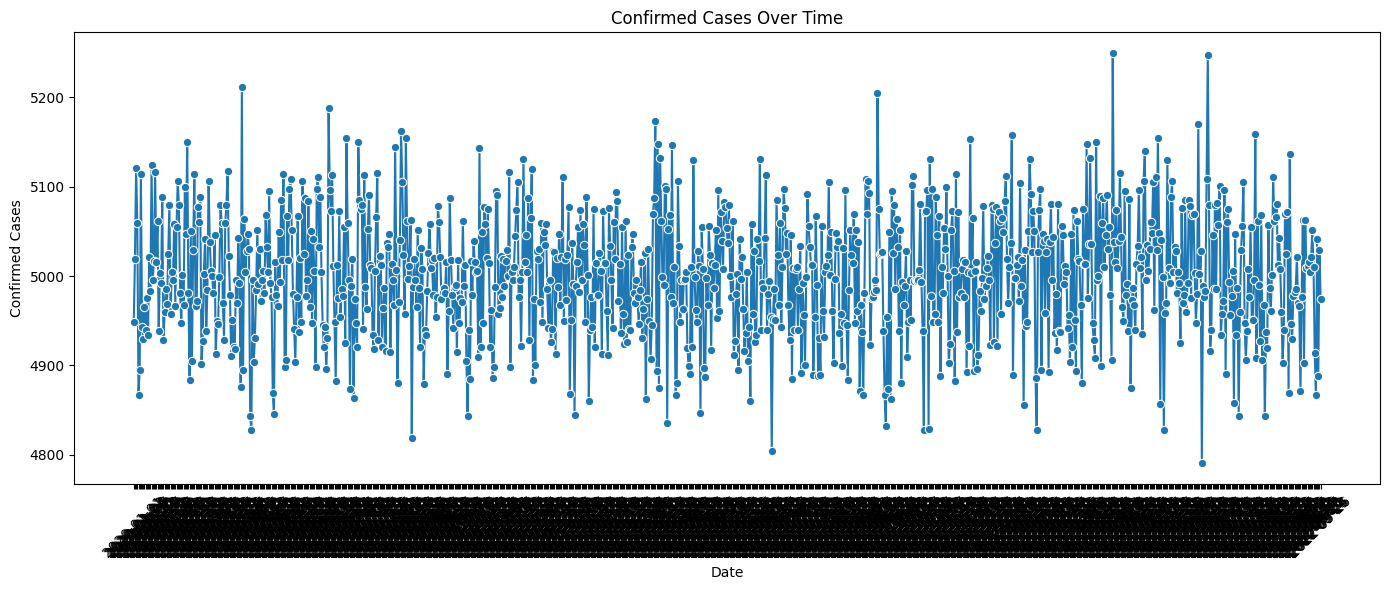

In [32]:
date_totals = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=date_totals, x='date', y='confirmed', marker='o')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Heatmap – Correlation Between Key Variables

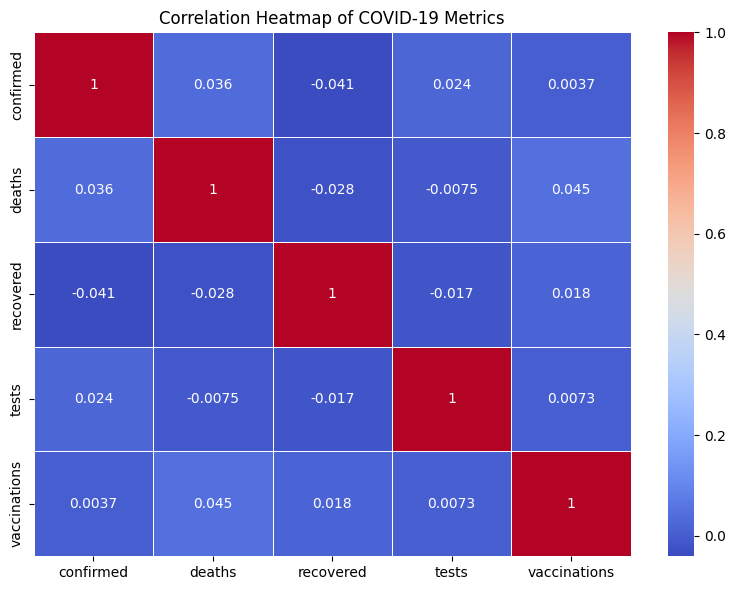

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['confirmed', 'deaths', 'recovered', 'tests', 'vaccinations']].corr(), 
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()


# Line Plot – Country-wise Trend of Confirmed Cases

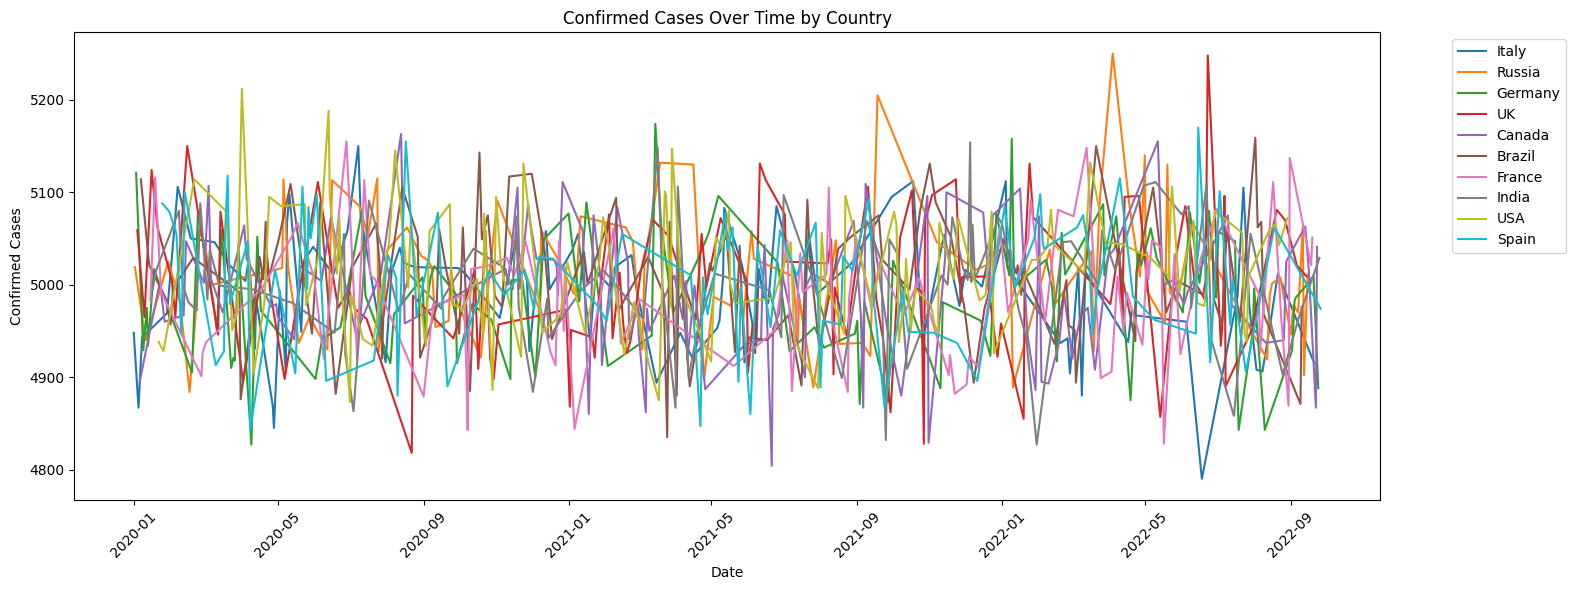

In [13]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='date', y='confirmed', hue='country')
plt.title('Confirmed Cases Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

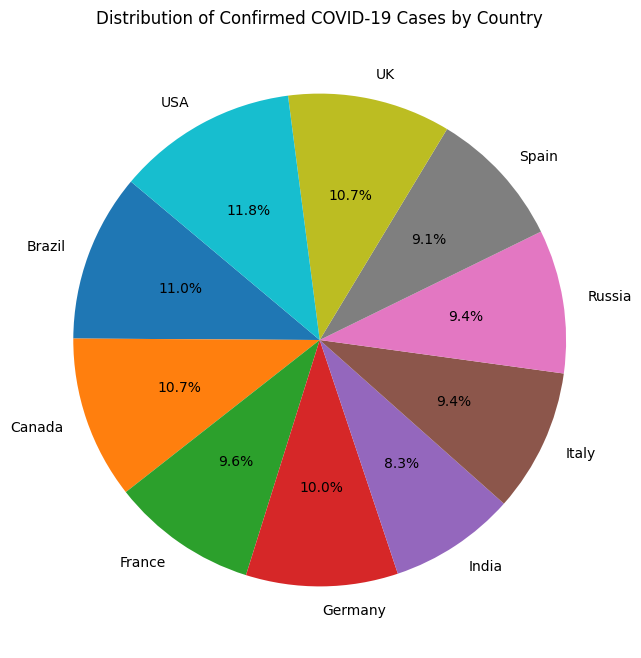

In [14]:


# Load dataset
df = pd.read_csv("covid_dataset_sample_1000.csv")

# Group by country and get total confirmed cases
country_cases = df.groupby("country")["confirmed"].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_cases, labels=country_cases.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Confirmed COVID-19 Cases by Country")
plt.show()


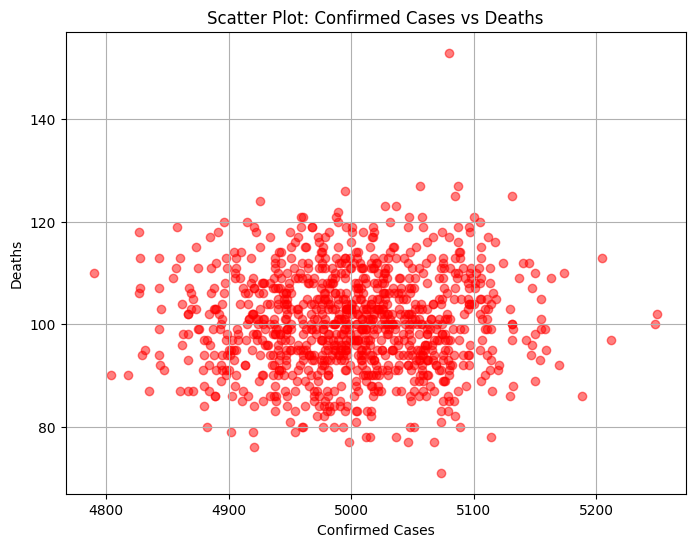

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("covid_dataset_sample_1000.csv")

plt.figure(figsize=(8,6))
plt.scatter(df["confirmed"], df["deaths"], alpha=0.5, c="red")
plt.title("Scatter Plot: Confirmed Cases vs Deaths")
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()


In [16]:
train_data=pd.read_csv("covid_dataset_sample_1000.csv")
train_data.head()

,date,country,confirmed,deaths,recovered,tests,vaccinations
0,2020-01-01,Italy,4948,99,4090,9901,2907
1,2020-01-02,Russia,5019,102,3932,10066,3028
2,2020-01-03,Germany,5121,92,3914,10118,2905
3,2020-01-04,UK,5059,89,3907,10114,2905
4,2020-01-05,Italy,4867,98,3921,9946,2989


In [17]:
test_data=pd.read_csv("covid_dataset_sample_1000.csv")
test_data.head()

,date,country,confirmed,deaths,recovered,tests,vaccinations
0,2020-01-01,Italy,4948,99,4090,9901,2907
1,2020-01-02,Russia,5019,102,3932,10066,3028
2,2020-01-03,Germany,5121,92,3914,10118,2905
3,2020-01-04,UK,5059,89,3907,10114,2905
4,2020-01-05,Italy,4867,98,3921,9946,2989


In [22]:
import pandas as pd
df = pd.read_csv("covid_dataset_sample_1000.csv")
df.head()
X = df[['deaths', 'recovered', 'tests', 'vaccinations']]
y = df['confirmed'] 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Training set shape: (800, 4)
Testing set shape: (200, 4)
Mean Squared Error: 4637.999845935508
R² Score: -0.017529199871768375


In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=5,            # maximum depth of trees
    min_samples_split=10,   # minimum samples to split a node
    min_samples_leaf=5,     # minimum samples in a leaf node
    random_state=42
)
rf.fit(X_train, y_train)
print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv("covid_dataset_sample_1000.csv")
X = df[['deaths', 'recovered', 'tests', 'vaccinations']]
y = df['confirmed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("First 10 Predictions:", y_pred[:10])
print("First 10 Actual:", y_test[:10].values)

First 10 Predictions: [5028.9  4986.03 4955.91 4994.96 4977.88 5002.3  4982.38 4966.8  4968.21
 4990.69]
First 10 Actual: [4958 5010 4889 4995 5055 5067 5205 4963 4962 4904]


In [25]:
import joblib
import pickle
with open("rf__retention_model.pkl","wb")as f:
    pickle.dump(rf,f)

In [26]:
import os
os.getcwd()

'C:\\Users\\HP\\Desktop\\app.py'

In [27]:
joblib.dump(rf,"rf_retention_model.pkl")

['rf_retention_model.pkl']

In [28]:
import joblib
model=joblib.load("rf_retention_model.pkl")

In [29]:
import pickle

# After training your model (example: RandomForestRegressor)
with open("trained_covid_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as trained_covid_model.pkl")


✅ Model saved as trained_covid_model.pkl
